# Sentiment Predictor Using Stress Detection with Convolutional Neural Networks

### - A Mini Project Submitted for the Data Mining course in Rajalakshmi Engineering College

## 1.First Installing the necessary dependencies

In [108]:


!pip install tensorflow
!pip install librosa
!pip install plotly




In [10]:
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow
py.init_notebook_mode(connected=True)


## Keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

## 2. Reading the Data

In [11]:
# Data Directory
# Please edit according to your directory change.
dir_list = os.listdir('C:\\Users\\akile\\OneDrive\\Desktop\\DM_End Sem\\sentiment-predictor-for-stress-detection-main\\Audio_Speech_Actors_01-24')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [14]:
# Create DataFrame for Data intel
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('C:\\Users\\akile\\OneDrive\\Desktop\\DM_End Sem\\sentiment-predictor-for-stress-detection-main\\Audio_Speech_Actors_01-24\\' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = 'C:\\Users\\akile\\OneDrive\\Desktop\\DM_End Sem\\sentiment-predictor-for-stress-detection-main\\Audio_Speech_Actors_01-24\\' + i + '\\' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [112]:
data_df['path']

0       C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
1       C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
2       C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
3       C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
4       C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
                              ...                        
1435    C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
1436    C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
1437    C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
1438    C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
1439    C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...
Name: path, Length: 1440, dtype: object

In [113]:
print (len(data_df))
data_df.tail(25)

1440


,path,source,actor,gender,intensity,statement,repetition,emotion,label
1415,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,1,1,1,5,female_angry
1416,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,0,0,0,6,female_fearful
1417,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,0,0,1,6,female_fearful
1418,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,0,1,0,6,female_fearful
1419,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,0,1,1,6,female_fearful
1420,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,1,0,0,6,female_fearful
1421,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,1,0,1,6,female_fearful
1422,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,1,1,0,6,female_fearful
1423,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,1,1,1,6,female_fearful
1424,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,24,female,0,0,0,7,female_none


## Plotting the audio file's waveform and its spectrogram

In [16]:
filename = data_df.path[1021]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Audio_Speech_Actors_01-24\Actor_18\03-01-01-01-01-02-18.wav


(22050, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

In [17]:
len(samples), sample_rate

(77989, 22050)

In [18]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [19]:
sample_rate/ len(samples)

0.28273218017925605

AttributeError: module 'librosa.display' has no attribute 'waveplot'

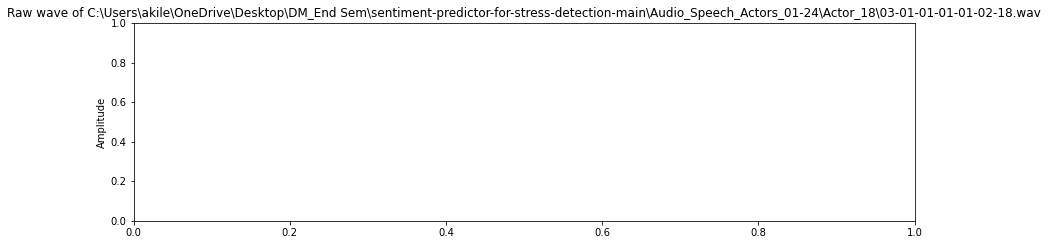

In [20]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [21]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [22]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([ 1.9985920e-07, -9.0237984e-07,  2.5921149e-06, ...,
         5.4710963e-05,  2.2816404e-05,  1.9574939e-06], dtype=float32),
 array([20992, 58880]))

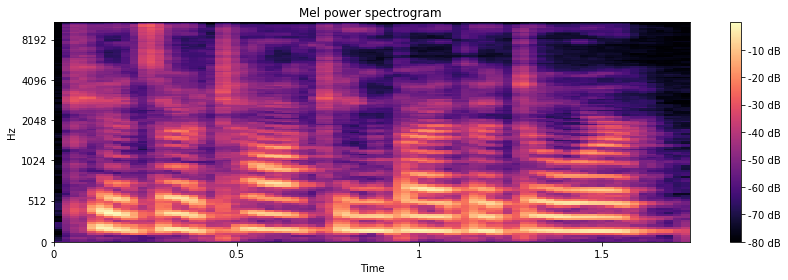

In [12]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [23]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

NameError: name 'log_S' is not defined

In [24]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [25]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [26]:
# Silence trimmed Sound by manual trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

## Defining the label

In [27]:
# 2 class: Positive & Negative

# Positive: Calm, Happy
# Negative: Angry, Fearful, Sad

label2_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        lb = "_positive"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
        
    # Add gender to the label    
    label2_list.append(data_df.gender[i] + lb)
    
len(label2_list)

1440

In [28]:
#3 class: Positive, Neutral & Negative

# Positive:  Happy
# Negative: Angry, Fearful, Sad
# Neutral: Calm, Neutral

label3_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        lb = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        lb = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
    
    # Add gender to the label  
    label3_list.append(data_df.gender[i] + lb)
    
len(label3_list)

1440

In [29]:
# 5 class: angry, calm, sad, happy & fearful
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"    
    else:
        lb = "_none"
    
    # Add gender to the label  
    label5_list.append(data_df.gender[i] + lb)
    
len(label5_list)

1440

In [30]:
# All class

label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        
    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    
len(label8_list)

1440

In [31]:
# Select the label set you want by commenting the unwanteds.

data_df['label'] = label5_list
# data_df['label'] = label3_list
# data_df['label'] = label5_list
#data_df['label'] = label8_list
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,0,0,1,male_none
1,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,0,1,1,male_none
2,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,1,0,1,male_none
3,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,1,1,1,male_none
4,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,0,0,2,male_calm


In [32]:

print (data_df.label.value_counts().keys())

Index(['male_none', 'female_none', 'male_calm', 'male_happy', 'male_sad',
       'male_angry', 'male_fearful', 'female_calm', 'female_happy',
       'female_sad', 'female_angry', 'female_fearful'],
      dtype='object')


In [33]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

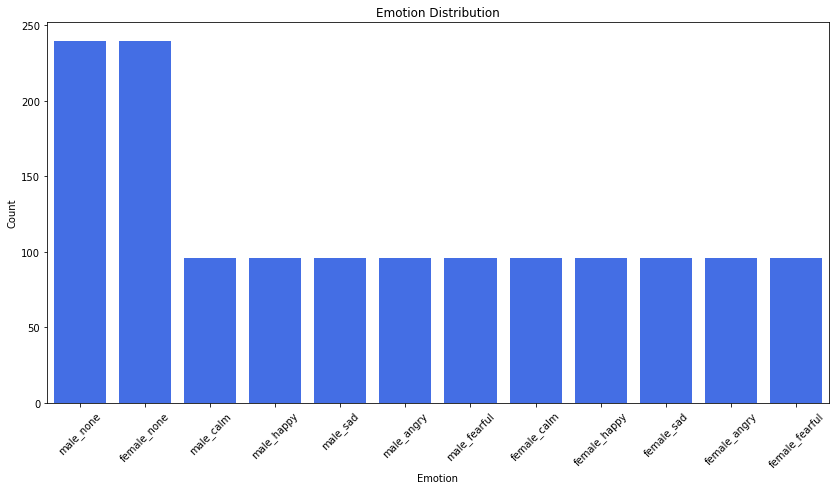

In [34]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

## Data Splitting

In [35]:
# Male Data Set

data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_positive"]
data2_df = data2_df[data2_df.label != "female_negative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head(50)

400


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,0,0,2,male_calm
1,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,0,1,2,male_calm
2,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,1,0,2,male_calm
3,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,1,1,2,male_calm
4,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,1,0,0,2,male_calm
5,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,1,0,1,2,male_calm
6,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,1,1,0,2,male_calm
7,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,1,1,1,2,male_calm
8,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,0,0,3,male_happy
9,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,1,male,0,0,1,3,male_happy


In [36]:
print (len(data3_df))
data3_df.head(80)

80


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,21,male,0,0,0,2,male_calm
1,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,21,male,0,0,1,2,male_calm
2,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,21,male,0,1,0,2,male_calm
3,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,21,male,0,1,1,2,male_calm
4,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,21,male,1,0,0,2,male_calm
...,...,...,...,...,...,...,...,...,...
75,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,23,male,0,1,1,6,male_fearful
76,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,23,male,1,0,0,6,male_fearful
77,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,23,male,1,0,1,6,male_fearful
78,C:\Users\akile\OneDrive\Desktop\DM_End Sem\sen...,1,23,male,1,1,0,6,male_fearful


## Analysing Features of audio files using librosa

In [37]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 400/400 [00:23<00:00, 17.08it/s]


In [39]:
data.head()

,feature
0,"[-70.26808, -70.26808, -70.26808, -70.26808, -..."
1,"[-67.55767, -67.55767, -67.55767, -67.55767, -..."
2,"[-69.69336, -69.69336, -69.69336, -69.69336, -..."
3,"[-69.051476, -69.051476, -69.051476, -69.05147..."
4,"[-73.84186, -73.84186, -73.84186, -73.72008, -..."


In [40]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [41]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-70.268082,-70.268082,-69.958099,-68.378006,-69.862946,-70.268082,-70.122566,-68.555412,-70.206917,-70.268082
1,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-65.240265,-65.536674,-67.557671,-67.557671,...,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.127472,-67.557671
2,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.620888,-69.693359,-68.906807,...,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.383789,-69.693359,-69.693359,-69.693359,-69.693359
3,-69.051476,-69.051476,-69.051476,-69.051476,-69.051476,-68.755074,-69.051476,-69.051476,-69.051476,-68.359322,...,-65.447311,-68.552307,-69.051476,-69.051476,-69.051476,-68.688873,-69.051476,NaN,NaN,NaN
4,-73.841858,-73.841858,-73.841858,-73.720078,-73.841858,-73.841858,-73.841858,-73.304192,-72.807358,-73.841858,...,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858


In [42]:
newdf = pd.concat([df3,labels], axis=1)

In [43]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

400

In [44]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-70.268082,-69.958099,-68.378006,-69.862946,-70.268082,-70.122566,-68.555412,-70.206917,-70.268082,male_calm
1,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-65.240265,-65.536674,-67.557671,-67.557671,...,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.127472,-67.557671,male_calm
2,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.620888,-69.693359,-68.906807,...,-69.693359,-69.693359,-69.693359,-69.693359,-69.383789,-69.693359,-69.693359,-69.693359,-69.693359,male_calm
3,-69.051476,-69.051476,-69.051476,-69.051476,-69.051476,-68.755074,-69.051476,-69.051476,-69.051476,-68.359322,...,-68.552307,-69.051476,-69.051476,-69.051476,-68.688873,-69.051476,NaN,NaN,NaN,male_calm
4,-73.841858,-73.841858,-73.841858,-73.720078,-73.841858,-73.841858,-73.841858,-73.304192,-72.807358,-73.841858,...,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,male_calm
5,-69.243607,-69.243607,-69.243607,-69.243607,-68.902374,-67.983444,-68.089653,-67.897789,-65.258499,-67.171410,...,-57.186440,-61.189224,-67.108902,-67.508621,-66.246048,-68.733475,-69.243607,-69.243607,-69.243607,male_calm
6,-73.255318,-73.255318,-73.255318,-73.255318,-68.774933,-69.380905,-73.255318,-73.255318,-73.255318,-73.255318,...,-50.886684,-55.668213,-54.602642,-53.441685,-56.299820,-57.457932,-58.767605,-59.844353,-59.074680,male_calm
7,-70.746674,-70.746674,-70.025597,-69.131645,-70.746674,-70.746674,-70.746674,-70.746674,-70.746674,-70.746674,...,-70.746674,-70.746674,-70.079544,-69.590736,-69.203033,-70.159676,-70.445572,-68.199638,-67.593987,male_calm
8,-63.787254,-63.128746,-63.412743,-63.797016,-63.582291,-58.921696,-57.955513,-61.225422,-63.783241,-63.797016,...,-63.740913,-62.410637,-62.489479,-62.494827,-62.633003,-62.878506,NaN,NaN,NaN,male_happy
9,-60.981300,-60.116249,-60.978966,-60.952496,-60.982536,-60.983990,-60.981300,-60.981300,-60.981300,-60.249794,...,-60.981300,-60.981300,-60.981300,-60.981300,-60.981300,-60.981300,NaN,NaN,NaN,male_happy


In [45]:
rnewdf.isnull().sum().sum()

2284

In [46]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-70.268082,-69.958099,-68.378006,-69.862946,-70.268082,-70.122566,-68.555412,-70.206917,-70.268082,male_calm
1,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-65.240265,-65.536674,-67.557671,-67.557671,...,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.127472,-67.557671,male_calm
2,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.620888,-69.693359,-68.906807,...,-69.693359,-69.693359,-69.693359,-69.693359,-69.383789,-69.693359,-69.693359,-69.693359,-69.693359,male_calm
3,-69.051476,-69.051476,-69.051476,-69.051476,-69.051476,-68.755074,-69.051476,-69.051476,-69.051476,-68.359322,...,-68.552307,-69.051476,-69.051476,-69.051476,-68.688873,-69.051476,0.000000,0.000000,0.000000,male_calm
4,-73.841858,-73.841858,-73.841858,-73.720078,-73.841858,-73.841858,-73.841858,-73.304192,-72.807358,-73.841858,...,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,male_calm


## Data Making/Processing

In [47]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

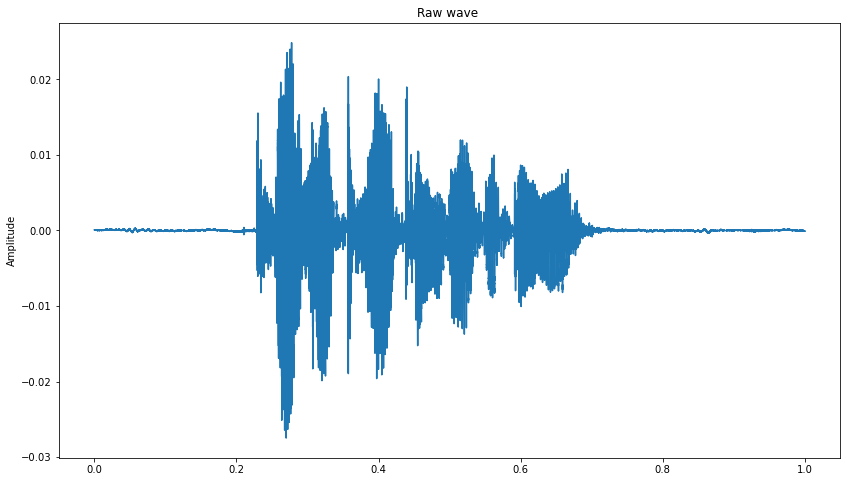

In [48]:
X, sample_rate = librosa.load(data2_df.path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.3)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

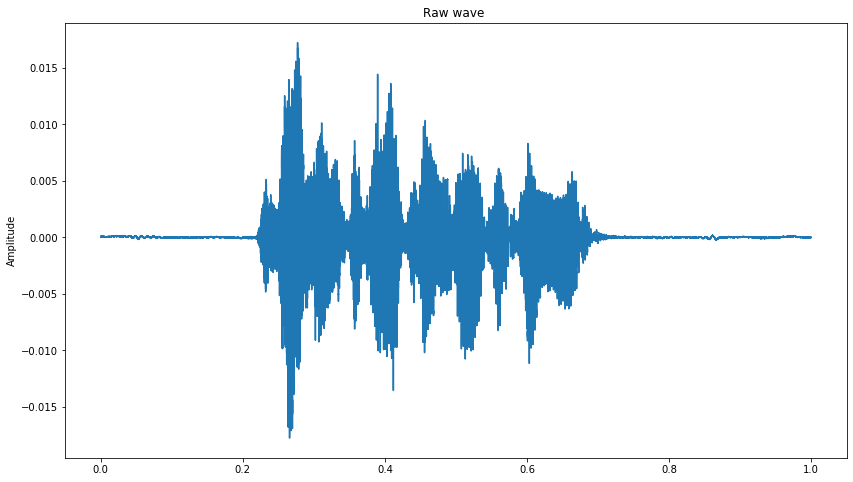

In [40]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [49]:
# Data Making Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 400/400 [00:26<00:00, 14.95it/s]


In [50]:
# Data Making Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]

  0%|          | 0/400 [00:00<?, ?it/s]C:\Users\akile\AppData\Local\Temp/ipykernel_17736/1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  0%|          | 1/400 [00:01<10:36,  1.60s/it]C:\Users\akile\AppData\Local\Temp/ipykernel_17736/1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  1%|▏         | 5/400 [00:03<03:30,  1.88it/s]C:\Users\akile\AppData\Local\Temp/ipykernel_17736/1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

100%|██████████| 400/400 [02:58<00:00,  2.24it/s]


In [51]:
len(syn_data1), len(syn_data2)

(400, 400)

In [52]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [53]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

400

In [54]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-61.471654,-58.693629,-57.448797,-56.795565,-56.175409,-56.642341,-56.923405,-55.760699,-54.247833,-53.608449,...,-59.506276,-57.583004,-58.003255,-57.969956,-57.110505,-57.488990,-58.062718,-58.195868,-60.154720,male_calm
1,-56.261407,-54.695868,-56.797532,-56.283184,-54.400116,-54.148434,-54.163422,-57.829054,-56.304802,-56.499494,...,-53.802892,-53.700204,-53.403351,-54.260686,-54.755185,-54.520193,-55.969880,-56.810558,-59.406321,male_calm
2,-59.277151,-54.711979,-54.551356,-55.856129,-56.057584,-55.002175,-52.005220,-50.916828,-51.840409,-52.794823,...,-53.564113,-53.576856,-54.099247,-53.693873,-53.103722,-54.706165,-56.535054,-55.378737,-54.786646,male_calm
3,-58.995664,-55.883652,-57.184009,-59.043197,-57.180230,-57.887410,-58.498618,-56.981230,-57.939367,-57.448577,...,-57.522086,-55.508504,-56.227486,-55.477129,-56.801339,-56.590830,0.000000,0.000000,0.000000,male_calm
4,-66.144524,-64.256277,-63.652335,-63.053850,-66.525074,-64.580729,-64.587764,-64.145955,-63.832241,-63.118258,...,-65.107133,-65.629937,-66.629793,-67.839425,-66.756944,-67.422039,-67.288058,-67.258710,-68.989291,male_calm


In [55]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

400

In [56]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-72.302070,-72.302070,-72.302070,-72.302070,-72.302070,-72.302070,-72.302070,-72.302070,-72.302070,-72.302070,...,-72.302070,-71.825073,-71.839131,-72.116871,-72.265521,-72.112303,-71.355640,-72.197159,-72.302070,male_calm
1,-68.885394,-68.885394,-68.570429,-68.885394,-68.885394,-68.885394,-65.603648,-66.749085,-68.885394,-68.885394,...,-68.885394,-68.885394,-68.885394,-68.885394,-68.885394,-68.885394,-68.885394,-68.885394,-68.885394,male_calm
2,-71.153167,-70.863636,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,-69.628710,...,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,-71.153167,male_calm
3,-70.193082,-70.193082,-70.193082,-70.193082,-70.193082,-70.193082,-70.178204,-70.193082,-70.193082,-70.193082,...,-68.785094,-70.115602,-70.193082,-70.193082,-70.193082,-70.171205,0.000000,0.000000,0.000000,male_calm
4,-74.894727,-74.894727,-74.894727,-74.782610,-74.894727,-74.894727,-74.894727,-74.894727,-74.268968,-74.894727,...,-74.894727,-74.894727,-74.894727,-74.894727,-74.894727,-74.894727,-74.894727,-74.894727,-74.894727,male_calm


In [57]:
# Combining the Proccessed data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()


,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-70.268082,-69.958099,-68.378006,-69.862946,-70.268082,-70.122566,-68.555412,-70.206917,-70.268082,male_calm
1,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-65.240265,-65.536674,-67.557671,-67.557671,...,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.127472,-67.557671,male_calm
2,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.693359,-69.620888,-69.693359,-68.906807,...,-69.693359,-69.693359,-69.693359,-69.693359,-69.383789,-69.693359,-69.693359,-69.693359,-69.693359,male_calm
3,-69.051476,-69.051476,-69.051476,-69.051476,-69.051476,-68.755074,-69.051476,-69.051476,-69.051476,-68.359322,...,-68.552307,-69.051476,-69.051476,-69.051476,-68.688873,-69.051476,0.000000,0.000000,0.000000,male_calm
4,-73.841858,-73.841858,-73.841858,-73.720078,-73.841858,-73.841858,-73.841858,-73.304192,-72.807358,-73.841858,...,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,-73.841858,male_calm


In [58]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [59]:
y_train.value_counts()

male_fearful    192
male_sad        192
male_angry      192
male_calm       192
male_happy      192
Name: label, dtype: int64

In [60]:
y_test.value_counts()

male_angry      48
male_fearful    48
male_calm       48
male_sad        48
male_happy      48
Name: label, dtype: int64

In [61]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [62]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [63]:
X_train

array([[-51.41130454, -46.74162932, -45.09811562, ...,   0.        ,
          0.        ,   0.        ],
       [-43.8127594 , -43.93165588, -44.57232666, ...,   0.        ,
          0.        ,   0.        ],
       [-56.93128967, -56.58560562, -60.33594513, ..., -58.06570816,
        -64.64757538, -68.69346619],
       ...,
       [-49.27816821, -46.32002795, -44.45689112, ...,   0.        ,
          0.        ,   0.        ],
       [-58.75115701, -54.75481902, -53.55922428, ...,   0.        ,
          0.        ,   0.        ],
       [-46.38318253, -47.40749741, -49.47633743, ..., -59.47906876,
        -60.39190674, -57.27294159]])

In [64]:
X_train.shape

(960, 259)

## Creating the CNN Model

In [65]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [66]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [67]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='valid',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(5))
model.add(Activation('softmax'))
#opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 252, 256)          2304      
                                                                 
 activation (Activation)     (None, 252, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 252, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 252, 256)          0         
                                                                 
 dropout (Dropout)           (None, 252, 256)          0         
                                                        

In [69]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('C:\\Users\\akile\\OneDrive\\Desktop\\DM_End Sem\\sentiment-predictor-for-stress-detection-main\\Saved_Models', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/100
60/60 [==============================] - ETA: 0s - loss: 1.3106 - accuracy: 0.4521

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 13s 213ms/step - loss: 1.3106 - accuracy: 0.4521 - val_loss: 1.5378 - val_accuracy: 0.3250 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - 9s 146ms/step - loss: 1.2625 - accuracy: 0.4667 - val_loss: 4.5042 - val_accuracy: 0.2167 - lr: 0.0010
Epoch 3/100
60/60 [==============================] - 9s 149ms/step - loss: 1.2298 - accuracy: 0.4896 - val_loss: 1.6304 - val_accuracy: 0.3417 - lr: 0.0010
Epoch 4/100
60/60 [==============================] - ETA: 0s - loss: 1.1715 - accuracy: 0.5333

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 13s 221ms/step - loss: 1.1715 - accuracy: 0.5333 - val_loss: 1.4728 - val_accuracy: 0.3708 - lr: 0.0010
Epoch 5/100
60/60 [==============================] - ETA: 0s - loss: 1.1223 - accuracy: 0.5385

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 14s 230ms/step - loss: 1.1223 - accuracy: 0.5385 - val_loss: 1.2701 - val_accuracy: 0.4708 - lr: 0.0010
Epoch 6/100
60/60 [==============================] - 10s 165ms/step - loss: 1.1022 - accuracy: 0.5510 - val_loss: 1.9380 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/100
60/60 [==============================] - 10s 168ms/step - loss: 1.0332 - accuracy: 0.5927 - val_loss: 1.5228 - val_accuracy: 0.3417 - lr: 0.0010
Epoch 8/100
60/60 [==============================] - ETA: 0s - loss: 0.9876 - accuracy: 0.6094

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 16s 265ms/step - loss: 0.9876 - accuracy: 0.6094 - val_loss: 1.1952 - val_accuracy: 0.4958 - lr: 0.0010
Epoch 9/100
60/60 [==============================] - 11s 193ms/step - loss: 0.9468 - accuracy: 0.6385 - val_loss: 1.3445 - val_accuracy: 0.4042 - lr: 0.0010
Epoch 10/100
60/60 [==============================] - 11s 176ms/step - loss: 0.9078 - accuracy: 0.6427 - val_loss: 1.4398 - val_accuracy: 0.3875 - lr: 0.0010
Epoch 11/100
60/60 [==============================] - 11s 190ms/step - loss: 0.9091 - accuracy: 0.6510 - val_loss: 1.5385 - val_accuracy: 0.4417 - lr: 0.0010
Epoch 12/100
60/60 [==============================] - 12s 193ms/step - loss: 0.8349 - accuracy: 0.6812 - val_loss: 2.2276 - val_accuracy: 0.3083 - lr: 0.0010
Epoch 13/100
60/60 [==============================] - 12s 193ms/step - loss: 0.7973 - accuracy: 0.6792 - val_loss: 1.4795 - val_accuracy: 0.4125 - lr: 0.0010
Epoch 14/100
60/60 [==============================] - 15s 257ms/st

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 18s 297ms/step - loss: 0.5727 - accuracy: 0.7823 - val_loss: 1.1005 - val_accuracy: 0.5708 - lr: 0.0010
Epoch 19/100
60/60 [==============================] - 13s 212ms/step - loss: 0.5489 - accuracy: 0.8021 - val_loss: 1.8136 - val_accuracy: 0.3833 - lr: 0.0010
Epoch 20/100
60/60 [==============================] - 12s 198ms/step - loss: 0.5159 - accuracy: 0.8021 - val_loss: 1.6464 - val_accuracy: 0.3958 - lr: 0.0010
Epoch 21/100
60/60 [==============================] - 11s 186ms/step - loss: 0.4873 - accuracy: 0.8167 - val_loss: 1.4414 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 22/100
60/60 [==============================] - 11s 192ms/step - loss: 0.3797 - accuracy: 0.8635 - val_loss: 1.5373 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 23/100
60/60 [==============================] - 11s 181ms/step - loss: 0.3758 - accuracy: 0.8521 - val_loss: 1.3856 - val_accuracy: 0.4833 - lr: 0.0010
Epoch 24/100
60/60 [==============================] - 12s 201ms/s

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 14s 236ms/step - loss: 0.2110 - accuracy: 0.9323 - val_loss: 0.9057 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 28/100
60/60 [==============================] - 10s 159ms/step - loss: 0.2657 - accuracy: 0.9167 - val_loss: 1.3361 - val_accuracy: 0.5292 - lr: 0.0010
Epoch 29/100
60/60 [==============================] - ETA: 0s - loss: 0.2371 - accuracy: 0.9146

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 16s 274ms/step - loss: 0.2371 - accuracy: 0.9146 - val_loss: 0.8007 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 30/100
60/60 [==============================] - ETA: 0s - loss: 0.2346 - accuracy: 0.9167

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 16s 269ms/step - loss: 0.2346 - accuracy: 0.9167 - val_loss: 0.7631 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 31/100
60/60 [==============================] - ETA: 0s - loss: 0.1479 - accuracy: 0.9563

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 16s 266ms/step - loss: 0.1479 - accuracy: 0.9563 - val_loss: 0.5618 - val_accuracy: 0.7875 - lr: 0.0010
Epoch 32/100
60/60 [==============================] - 9s 149ms/step - loss: 0.1379 - accuracy: 0.9531 - val_loss: 2.4432 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 33/100
60/60 [==============================] - 10s 175ms/step - loss: 0.2448 - accuracy: 0.9135 - val_loss: 0.7520 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 34/100
60/60 [==============================] - 10s 172ms/step - loss: 0.1334 - accuracy: 0.9490 - val_loss: 0.9715 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 35/100
60/60 [==============================] - 10s 165ms/step - loss: 0.1315 - accuracy: 0.9594 - val_loss: 0.6271 - val_accuracy: 0.7875 - lr: 0.0010
Epoch 36/100
60/60 [==============================] - 10s 162ms/step - loss: 0.1435 - accuracy: 0.9500 - val_loss: 2.3022 - val_accuracy: 0.4625 - lr: 0.0010
Epoch 37/100
60/60 [==============================] - 9s 158ms/ste

INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


INFO:tensorflow:Assets written to: C:\Users\akile\OneDrive\Desktop\DM_End Sem\sentiment-predictor-for-stress-detection-main\Saved_Models\assets


60/60 [==============================] - 12s 196ms/step - loss: 0.0083 - accuracy: 0.9979 - val_loss: 0.5082 - val_accuracy: 0.8500 - lr: 9.0000e-04
Epoch 58/100
60/60 [==============================] - 8s 137ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 1.0767 - val_accuracy: 0.7083 - lr: 9.0000e-04
Epoch 59/100
60/60 [==============================] - 8s 134ms/step - loss: 0.0203 - accuracy: 0.9969 - val_loss: 1.2950 - val_accuracy: 0.6875 - lr: 9.0000e-04
Epoch 60/100
60/60 [==============================] - 8s 132ms/step - loss: 0.0753 - accuracy: 0.9740 - val_loss: 0.6733 - val_accuracy: 0.8042 - lr: 9.0000e-04
Epoch 61/100
60/60 [==============================] - 8s 133ms/step - loss: 0.1403 - accuracy: 0.9542 - val_loss: 0.7315 - val_accuracy: 0.7792 - lr: 9.0000e-04
Epoch 62/100
60/60 [==============================] - 8s 128ms/step - loss: 0.0697 - accuracy: 0.9812 - val_loss: 0.7329 - val_accuracy: 0.7708 - lr: 9.0000e-04
Epoch 63/100
60/60 [==========================

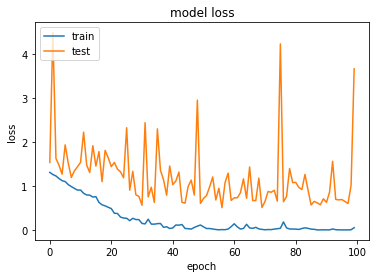

In [72]:

# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
# Saving the model.json

import json
model_json = model.to_json()
with open("C:\\Users\\akile\\OneDrive\\Desktop\\DM_End Sem\\sentiment-predictor-for-stress-detection-main\\Predictions Data\\model.json", "w") as json_file:
    json_file.write(model_json)

In [81]:
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
loaded_model = tf.keras.models.load_model("C:\\Users\\akile\\OneDrive\\Desktop\\DM_End Sem\\sentiment-predictor-for-stress-detection-main\\Predictions Data\\Data_noiseNshift.h5",custom_objects={'GlorotUniform': glorot_uniform()})
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 88.75%


## Predicting emotions on the test data

In [82]:
len(data2_df)

400

In [83]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data2_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 400/400 [00:21<00:00, 18.71it/s]


In [84]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

25/25 [==============================] - 1s 36ms/step


In [85]:
preds

array([[1.0854284e-05, 9.9890709e-01, 3.3253343e-07, 2.9955707e-08,
        1.0816918e-03],
       [7.4578202e-05, 9.9838364e-01, 6.8133920e-07, 1.2567189e-05,
        1.5284711e-03],
       [5.1943639e-06, 9.9968433e-01, 1.2815306e-08, 3.1250753e-08,
        3.1049817e-04],
       ...,
       [4.6089656e-07, 2.7187240e-13, 9.9999952e-01, 1.1947058e-11,
        5.0907513e-08],
       [1.6664907e-07, 3.9897976e-12, 9.9999952e-01, 1.2657720e-09,
        3.1535743e-07],
       [2.4404744e-05, 1.1160743e-08, 9.9993157e-01, 2.7420314e-05,
        1.6565933e-05]], dtype=float32)

In [86]:
preds1=preds.argmax(axis=1)

In [87]:
preds1

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 0, 4, 4,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 2, 2, 4, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 0, 0, 3, 3, 3, 3, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 4, 1, 1, 3, 3, 0, 0,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 3, 0, 3, 3, 3, 3, 3,
       0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 4, 4, 1,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 4, 4, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 3, 3, 3, 3, 0, 4, 0, 0, 0, 0,

In [88]:
abc = preds1.astype(int).flatten()

In [89]:
print(abc)

[1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 4 4 4 0 4 4 1 4 0 0 0 0 0 0 0 0 2 2 2 2 2
 3 2 2 4 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 2 2
 2 0 0 2 0 2 1 1 1 1 1 1 1 1 3 0 0 3 3 3 3 0 0 4 0 4 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 1 1 1 1 1 4 1 1 3 3 0 0 3 3 3 3 4 4 4 4 4 4 4 4 0 0 0 0
 0 0 0 0 4 2 2 0 2 2 0 2 0 0 1 1 0 1 1 1 0 3 0 3 3 3 3 3 0 4 0 0 4 4 4 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 3 3 3 3 0 4 4 1 0 4
 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 4 4 4
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 0 0 0 3 3 3 3 0
 4 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 0 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 3 3
 0 0 3 3 3 3 1 4 0 4 4 4 0 4 0 0 0 0 0 0 0 0 2 3 2 2 2 2 2 2]


In [91]:
predictions = (lb.inverse_transform((abc)))

In [92]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_calm
1,male_calm
2,male_calm
3,male_calm
4,male_calm
5,male_calm
6,male_calm
7,male_calm
8,male_happy
9,male_happy


In [93]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [94]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_calm
1,male_calm
2,male_calm
3,male_calm
4,male_calm
5,male_calm
6,male_calm
7,male_calm
8,male_happy
9,male_happy


In [95]:
finaldf = actualdf.join(preddf)
#abc1234 = finaldf.astype(float).flatten()
#finalvalues = (lb.inverse_transform((abc1234)))

## Actual vs Predicted Values

In [96]:
finaldf[40:60]

,actualvalues,predictedvalues
40,male_calm,male_sad
41,male_calm,male_calm
42,male_calm,male_calm
43,male_calm,male_calm
44,male_calm,male_calm
45,male_calm,male_calm
46,male_calm,male_calm
47,male_calm,male_calm
48,male_happy,male_happy
49,male_happy,male_happy


In [97]:
finaldf.groupby('actualvalues').count()


,predictedvalues
actualvalues,
male_angry,80
male_calm,80
male_fearful,80
male_happy,80
male_sad,80


In [98]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_angry,180
male_calm,68
male_fearful,38
male_happy,59
male_sad,55


In [101]:
finaldf.to_csv('C:\\Users\\akile\\OneDrive\\Desktop\DM_End Sem\\sentiment-predictor-for-stress-detection-main\\Predictions Data\\Predictions.csv', index=False)

In [102]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [103]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

72.25

In [104]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

73.87251421832572

In [105]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[79,  1,  0,  0,  0],
       [15, 63,  0,  0,  2],
       [39,  0, 38,  2,  1],
       [23,  0,  0, 57,  0],
       [24,  4,  0,  0, 52]], dtype=int64)

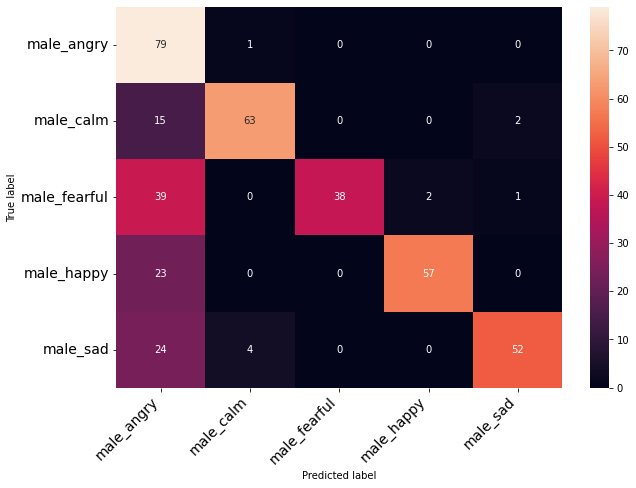

In [106]:
# Visualize Confusion Matrix 

class_names = ['male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']
#class_names1 = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad']
#class_names = ['male_negative', 'male_neutral', 'male_positive']
#class_names = ['male_negative', 'male_positive']
#class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']


print_confusion_matrix(c, class_names)